<a href="https://colab.research.google.com/github/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/10.%20OpenCV%20%EC%9E%84%EA%B3%84%EC%A0%90%20%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0/OpenCV%20%EC%9E%84%EA%B3%84%EC%A0%90%20%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenCV 임계점 처리하기
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/10.%20OpenCV%20%EC%9E%84%EA%B3%84%EC%A0%90%20%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20OpenCV%20%EC%9E%84%EA%B3%84%EC%A0%90%20%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0.pdf)


cv2.threshold(image, thresh, max_value, type): 임계값을 기준으로 흑/백으로 분류하는 함수

- image: 처리할 Gray Scale 이미지
- thresh: 임계 값 (전체 픽셀에 적용)
- max_value: 임계 값을 넘었을 때 적용할 값
- type: 임계점을 처리하는 방식

1) THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0

2) THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0

3) THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로

4) THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0

5) THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

In [1]:
from google.colab import files
uploaded = files.upload()

Saving gray_image.jpg to gray_image.jpg


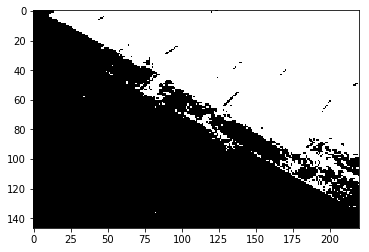

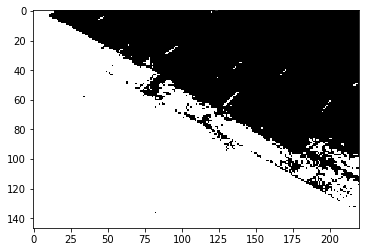

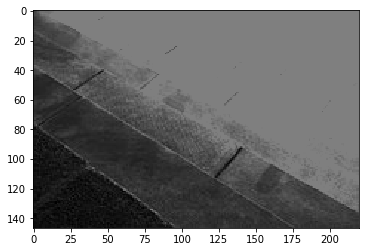

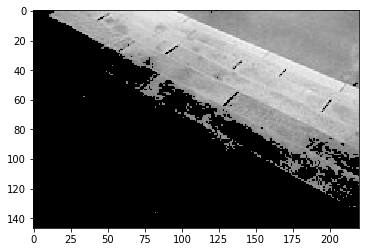

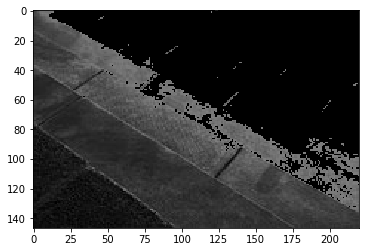

In [9]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C): 적응 임계점 처리 함수

하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋습니다.

- max_value: 임계 값을 넘었을 때 적용할 값

- adaptive_method: 임계 값을 결정하는 계산 방법

1) ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정

2) ADAPTIVE_THRESH_GAUSSIAN_C

- type: 임계점을 처리하는 방식

- block_size: 임계 값을 적용할 영역의 크기

- C: 평균이나 가중 평균에서 차감할 값

Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않습니다.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving hand_writing_image.jpg to hand_writing_image.jpg


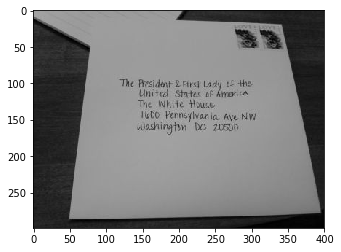

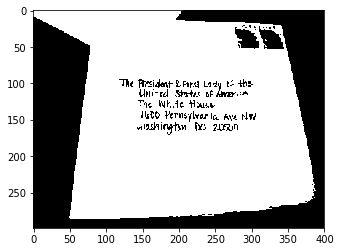

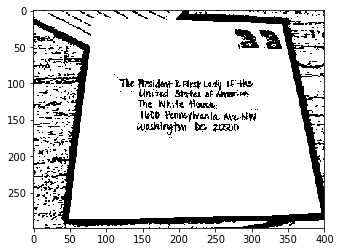

In [23]:
import cv2

image = cv2.imread('hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()